In [ ]:
# Importing Libraries

from functools import reduce
import numpy as np
import numpy
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.pipeline import make_pipeline
import random
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_wine
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
%matplotlib inline

# Task 1 Loading Datasets

In [89]:
# Loading  Wine dataset and train test split
X_winedata,y_winedata = load_wine().data,load_wine().target
wineX_train, wineX_test, winey_train, winey_test = train_test_split(X_winedata, y_winedata,random_state=2409)
print(wineX_train.shape, wineX_test.shape)

(133, 13) (45, 13)


In [90]:
# Loading  USPS Digit Dataset
digit_train_data = np.genfromtxt("zip.train.gz", usecols=np.arange(1,257), dtype='float')
digit_test_data = np.genfromtxt("zip.test.gz", usecols=np.arange(1,257), dtype='float')
digit_data = np.row_stack((digit_train_data, digit_test_data))


In [91]:
digit_train_target = np.genfromtxt("zip.train.gz", usecols=0, dtype='int')
digit_test_target = np.genfromtxt("zip.test.gz", usecols=0, dtype='int')
digit_target = np.append(digit_train_target, digit_test_target)

In [92]:
digit_target.shape

(9298,)

In [93]:
pd.DataFrame(X_winedata).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


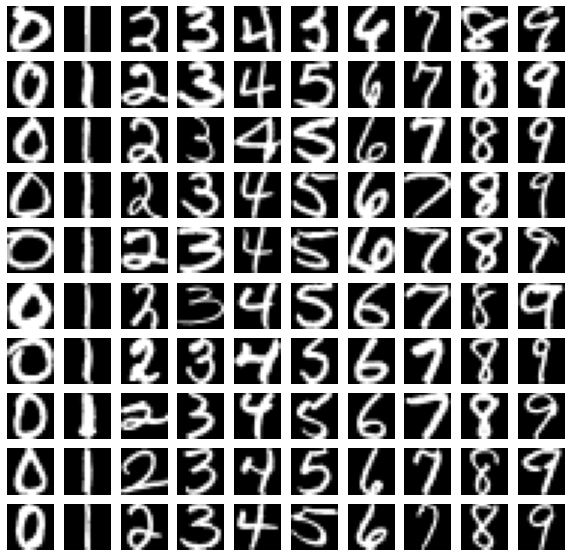

In [94]:
num_samples = 10
num_classes = len(set(digit_target))

classes = set(digit_target)
num_classes = len(classes)
fig, ax = plt.subplots(num_samples, num_classes, sharex = True, sharey = True, figsize=(num_classes, num_samples))

for label in range(num_classes):
    class_idxs = np.where(digit_target == label)
    for i, idx in enumerate(np.random.randint(0, class_idxs[0].shape[0], num_samples)):
        ax[i, label].imshow(digit_data[class_idxs[0][idx]].reshape([16, 16]), 'gray')
        ax[i, label].set_axis_off()

In [95]:
# Task 2 train test split

In [96]:
digitsX_Train, digitsX_Test, digitsy_Train, digitsy_Test = train_test_split(digit_data, digit_target,random_state=2206)
print(digitsX_Train.shape, digitsX_Test.shape)

(6973, 256) (2325, 256)


# Task 3

In [97]:
#cross-validation
# 1st dataset
svc_wine = svm.SVC()
scores = cross_val_score(svc_wine, wineX_train, winey_train)
print("wine data scores: ",scores)

wine data scores:  [0.7037037  0.66666667 0.7037037  0.69230769 0.73076923]


In [98]:
#Second dataset
svc_digit = svm.SVC()
scores = cross_val_score(svc_digit, digitsX_Train, digitsy_Train)
print("digit data scores: ",scores)

digit data scores:  [0.96917563 0.96774194 0.97562724 0.97202296 0.97345768]


 # Task 4

In [99]:
print("Wine dataset------->")
scores = cross_val_score(svc_wine, wineX_test, winey_test)
print("Error Rate : ",numpy.mean((1-scores)))

print("Digit dataset------->")
scores = cross_val_score(svc_digit, digitsX_Test, digitsy_Test, cv=5)
print("Error Rate: ",numpy.mean((1-scores)))

Wine dataset------->
Error Rate :  0.31111111111111117
Digit dataset------->
Error Rate:  0.04387096774193548


**Ans:** the model that is trained using digit dataset is doing well as it has low test error rate compared to wine dataset model

# Task 5

In [87]:
print("Wine Dataset---->")
svc_wine = svm.SVC()
std = StandardScaler()
pipeline = make_pipeline(std,svc_wine)
param_grid = {'svc__C': [0.1,1, 10, 20,30], 'svc__gamma': [0.01,0.001,1,0.1,0.001],'svc__kernel': ['rbf','poly', 'sigmoid']}
gridWine = GridSearchCV(pipeline,param_grid,cv=5,scoring='accuracy')
gridWine.fit(wineX_train, winey_train)
print(gridWine.best_score_)
print(gridWine.best_params_)

print("Digit data------>")
svc_digit = svm.SVC()
std = StandardScaler()
pipeline = make_pipeline(std,svc_digit)
param_grid = {'svc__C': [0.1,1, 10, 50], 'svc__gamma': [0.01,0.001,1,0.1],'svc__kernel': ['rbf', 'sigmoid']}
gridDigit = GridSearchCV(pipeline,param_grid,cv=5,scoring='accuracy')
gridDigit.fit(digitsX_Train, digitsy_Train)
print(gridDigit.best_score_,'\n')
print(gridDigit.best_params_)

Wine Dataset---->
0.9923076923076923
{'svc__C': 1, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}
Digit data------>


KeyboardInterrupt: 

# Task 6

In [ ]:
print("Wine Dataset---->\n")
gridWine.fit(wineX_train, winey_train)
y_pred = gridWine.predict(wineX_test)
print("Test error Rate----> ",accuracy_score(y_pred,winey_test))

print( "Digit Dataset----->\n")
gridDigit.fit(digitsX_Train, digitsy_Train)
y_pred = gridDigit.predict(digitsX_Test)
print("Test error Rate----> ",accuracy_score(y_pred,digitsy_Test))

# Task 7

In [ ]:
from sklearn.model_selection import KFold
def cross_conformal_predictor(X,Y,grid_search_obj):
    kFolds = KFold(shuffle=True, random_state=0)
    scores = []
    for train_index, test_index in kFolds.split(X):
        train_data, test_data = X[train_index], X[test_index]
        train_labels, test_labels = Y[train_index], Y[test_index]  
        grid_search_obj.fit(train_data, train_labels)   
        scores.append(accuracy_score(test_labels, grid_search_obj.predict(test_data)))
    return scores
print("Wine Dataset---->")
cross_conformal_predictor(wineX_train, winey_train,gridWine)  

In [ ]:
print("Digit Dataset---->")
cross_conformal_predictor(digitsX_Train, digitsy_Train,gridDigit) 

# Task 8

In [30]:
# Task 3 
print("Wine Dataset---->")
MLP_wine = MLPClassifier(hidden_layer_sizes=(100,20,10,5),activation="relu",random_state=1)
#cross-validation
scores = cross_val_score(MLP_wine, wineX_train, winey_train)
print("wine data score: ",scores.mean())

print("Digit data------>")
MLP_digit = MLPClassifier(hidden_layer_sizes=(100,20,10,5),activation="relu",random_state=1)
#Second dataset
scores = cross_val_score(MLP_digit, digitsX_Train, digitsy_Train)
print("digit data score: ",scores.mean())

Wine Dataset---->


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


wine data score:  0.2706552706552706


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [31]:
# Task 4 
scores = cross_val_score(MLP_wine, wineX_test, winey_test)
print("Error Rate wine dataset: ",numpy.mean((1-scores)))
scores = cross_val_score(MLP_digit, digitsX_Test, digitsy_Test)
print("Error Rate digit dataset: ",numpy.mean((1-scores)))

Error Rate wine dataset:  0.7333333333333334


In [32]:
# Task 5 
param_grid = [
    {
     'estimator': [MLPClassifier(random_state=random.seed())],
     'estimator__hidden_layer_sizes': [(250, 90, 55, 20), (400, 200, 100, 30), (250, 90, 45, 10)],
     'estimator__activation': ['tanh', 'relu'],
     'estimator__alpha': [0.0001, 0.001, 0.005]
     }
    ]


std = StandardScaler()
pipeline_wine = Pipeline([('scaler', std), ('estimator', MLPClassifier())])
gridWine = GridSearchCV(estimator=pipeline_wine, param_grid=param_grid, 
                            n_jobs=-1, cv=5, refit=True, verbose=1, 
                            return_train_score=False)
gridWine.fit(wineX_train, winey_train)
print("best score for wine dataset",gridWine.best_score_)
print("best params for wine dataset",gridWine.best_params_)

print()
std = StandardScaler()
pipeline_wine = Pipeline([('scaler', std), ('estimator', MLPClassifier())])
gridDigit = GridSearchCV(estimator=pipeline_wine, param_grid=param_grid, 
                            n_jobs=-1, cv=5, refit=True, verbose=1, 
                            return_train_score=False)
gridDigit.fit(digitsX_Train, digitsy_Train)
print("best score for wine dataset",gridDigit.best_score_)
print("best params for wine dataset",gridDigit.best_params_)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    8.1s finished


best score for wine dataset 0.9772079772079773
best params for wine dataset {'estimator': MLPClassifier(activation='tanh', alpha=0.001,
              hidden_layer_sizes=(400, 200, 100, 30)), 'estimator__activation': 'tanh', 'estimator__alpha': 0.001, 'estimator__hidden_layer_sizes': (400, 200, 100, 30)}


In [33]:
# Task 6 
gridWine.fit(wineX_train, winey_train)
y_pred = gridWine.predict(wineX_test)
print("Test error Rate----> ",accuracy_score(y_pred,winey_test))

gridDigit.fit(digitsX_Train, digitsy_Train)
y_pred = gridDigit.predict(digitsX_Test)
print("Test error Rate----> ",accuracy_score(y_pred,digitsy_Test))

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    6.6s finished


Test error Rate---->  1.0


In [ ]:
# The code works its just taking very long to compile, showed as much as I can